In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

In [32]:
df = pd.read_csv('Bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [33]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [34]:
print( df['balance'].quantile(0.99))

13164.900000000001


In [35]:
def balanceator(x):
    if x < 72:
        return 'Class E'
    elif x >= 72 and x < 448:
        return 'Class D'
    elif x >= 448 and x < 1428:
        return 'Class C'
    elif x >= 1428 and x < df['balance'].quantile(0.99):
        return 'Class B'
    else:
        return 'Class A'

In [36]:
def wrangle(path):
    df = pd.read_csv(path, sep=';') # Read CSV file
    df['y'] = df['y'].apply(lambda x: True if x == 'yes' else False) # Change object output to bool
    df['default'] = df['default'].apply(lambda x: True if x == 'yes' else False) # Change object output to bool
    df['balance_class'] = df['balance'].apply(lambda x: balanceator(x)) # Creates a new categoric column 'balance_class' using data from 'balance' column
    df['housing'] = df['housing'].apply(lambda x: True if x == 'yes' else False) # Change object output to bool
    df['loan'] = df['loan'].apply(lambda x: True if x == 'yes' else False) # Change object output to bool
    df['previous_bool'] = df['previous'].apply(lambda x: True if x != 0 else False) # Change object output to bool for visualization and modeling purpuses
    
    
    #drop columns:
    to_drop =['previous', 'day', 'poutcome', 'pdays'] 
    df.drop(columns= to_drop, inplace=True)
    
    #df.drop('previous', 'day', 'poutcome', 'pdays',axis=1)
    
    return df

In [37]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [38]:
df_pos = wrangle('bank.csv')

In [39]:
df_pos.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,y,balance_class,previous_bool
0,58,management,married,tertiary,False,2143,True,False,unknown,may,261,1,False,Class B,False
1,44,technician,single,secondary,False,29,True,False,unknown,may,151,1,False,Class E,False
2,33,entrepreneur,married,secondary,False,2,True,True,unknown,may,76,1,False,Class E,False
3,47,blue-collar,married,unknown,False,1506,True,False,unknown,may,92,1,False,Class B,False
4,33,unknown,single,unknown,False,1,False,False,unknown,may,198,1,False,Class E,False


In [40]:
from sklearn.preprocessing import LabelEncoder

def LabelEncoding(columns):
    le = LabelEncoder()
    for col in columns:
        df_pos[col] = le.fit_transform(df_pos[col])
        #print(f"Encoded '{col}': {df_pos[col].unique()}")
    return df_pos[columns]

# List of columns to encode
labels = ['job', 'marital', 'education', 'default', 'housing', 'loan',
          'contact', 'month', 'campaign', 'y', 'balance_class', 'previous_bool']

# Apply label encoding
encoded_df = LabelEncoding(labels)
print("Encoded subset of df_pos:\n", encoded_df.head())


# Sample array

# Create a LabelEncoder instance
#le = LabelEncoder()

# Fit and transform the array
#encoded_labels = le.fit_transform(labels)

#("Original labels:", labels)
#print("Encoded labels:", encoded_labels)


Encoded subset of df_pos:
    job  marital  education  default  housing  loan  contact  month  campaign  \
0    4        1          2        0        1     0        2      8         0   
1    9        2          1        0        1     0        2      8         0   
2    2        1          1        0        1     1        2      8         0   
3    1        1          3        0        1     0        2      8         0   
4   11        2          3        0        0     0        2      8         0   

   y  balance_class  previous_bool  
0  0              1              0  
1  0              4              0  
2  0              4              0  
3  0              1              0  
4  0              4              0  


In [41]:
X = df_pos.drop(columns = ["y", "balance", 'duration'])
y = df_pos['y']

In [42]:
oe = OrdinalEncoder()
X = oe.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [45]:
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), {}, n_jobs=-1, cv=10, refit="recall")
dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1, param_grid={}, refit='recall')

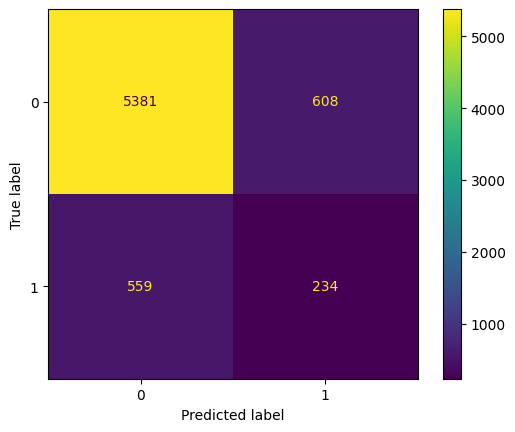

In [46]:
ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)

In [47]:
pred = dt.predict(X_test)

In [48]:
print (classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      5940
           1       0.30      0.28      0.29       842

    accuracy                           0.83      6782
   macro avg       0.60      0.59      0.59      6782
weighted avg       0.82      0.83      0.83      6782



In [49]:
params_dt = {
    "max_depth": [5, 10, 15, 20, 25, 30, None], # Maximum depth of the decision tree
    "criterion": ["gini","entropy"], # The quality criterion to measure the information gain when splitting nodes
    "min_samples_split": [2,3], # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1,2] # Minimum number of samples required to be at a leaf node
}

In [50]:
model_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42), # Define the Decision Tree model
    params_dt, # Pass in the hyperparameters to be tuned from the dictionary we defined earlier
    cv=10, # Set the number of folds for cross-validation
    verbose=2
)

In [51]:
model_dt.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]},
             verbose=2)

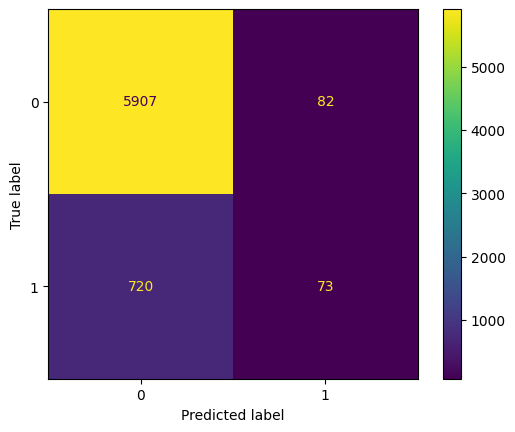

In [52]:
ConfusionMatrixDisplay.from_estimator(model_dt,X_test,y_test)

In [53]:
pred_dt = model_dt.predict(X_test)

In [54]:
print (classification_report(pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      6627
           1       0.09      0.47      0.15       155

    accuracy                           0.88      6782
   macro avg       0.54      0.68      0.55      6782
weighted avg       0.97      0.88      0.92      6782



Logistics Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)
ln_reg_pred_y=log_reg.predict(X_test)


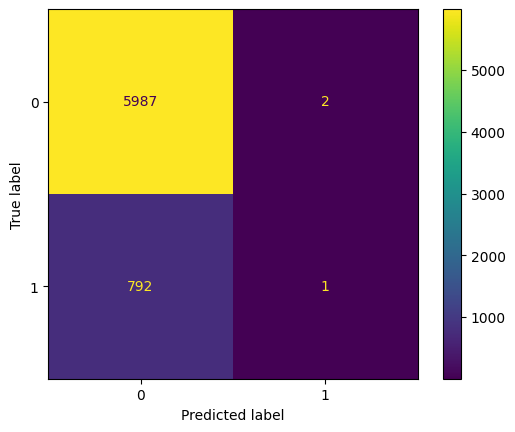

In [57]:
ConfusionMatrixDisplay.from_estimator(log_reg,X_test,y_test)

In [58]:
print (classification_report(ln_reg_pred_y, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      6779
           1       0.00      0.33      0.00         3

    accuracy                           0.88      6782
   macro avg       0.50      0.61      0.47      6782
weighted avg       1.00      0.88      0.94      6782

